# **Principles of Data Analytics - Iris Dataset Analysis**

### Authored by: Stephen Kerr

---

## **Introduction:**

This notebook contains my analysis of the famous Iris Dataset which is classic multi-class classification dataset. This flower classification dataset from Fisher, 1936 (see documentation [here](https://archive.ics.uci.edu/dataset/53/iris)) was sourced from **Sckit-learn** `load_iris` (see the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html))

The Iris Dataset is one of the earliest used in literature and is used widely for statistics and machine learning. The Image below illustrates the Three Iris Flower Species and their anatomy (Image sourced from [here](https://www.analyticsvidhya.com/blog/2022/06/iris-flowers-classification-using-machine-learning/)).


  
  
![iris flower image](https://editor.analyticsvidhya.com/uploads/51518iris%20img1.png) 

___
## **Task 1: Source the Data Set**

The **`load_iris()`** function loads the Iris dataset. 

The dataset is imported as a *'Bunch'* which is a dictionary like-object with the following attributes: 

| **Attribute** | **Description** |
|---|------|
|**'data'** | which is a pandas Dataframe. |
|**'target'** | which is the classification target. |
|**'feature_name'** | which is a list of the dataset columns. |
|**'target_names'** | which is a list of the target classes. |
| **'target'** | attribute is a pandas Series. |
| **'DESCR'** | which is a string that is a full description of the dataset. |
| **'filename'** | which is a string showing the path to the location of the data. |
| **'frame'** | which is a pandas DataFrame with the combination of data and target. |

Note, the Iris Dataset was loaded with the parameter `'as_frame' = 'True` resulting in an *additional attribute* called `'frame'`. 

See [Markdown Syntax Cheatsheet](https://www.markdown-cheatsheet.com/)

### **Imports:**

In [1]:
# import numpy as np
import numpy as np

# import pandas as pd
import pandas as pd

# import matplotlib as plt
import matplotlib.pyplot as plt

# import sklearn as skl
from sklearn.datasets import load_iris

# import Ipython.display as display - to display my tables
from IPython.display import display 

# import scipy to calculate R^2
import  scipy.stats as stats

# import seaborn as sns
import seaborn as sns

### **Load Iris Dataset**

In [2]:
# Load the iris data set.
# Note, used the parameter 'as_frame' = True to get the data in a pandas DataFrame.
iris = load_iris(as_frame=True)

### **Data Type**
As shown below the Iris Dataset is a **Bunch** Data Type. 

A **Bunch** is the Scikit-learn data type that stores the data in a dictionary-like object that stores the data in key-value pairs. The keys are the attributes of the dataset and the values are the data values. See the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.utils.Bunch.html#sklearn.utils.Bunch).

In [3]:
# The iris data set is a Bunch object.
print(f'The Iris Data Set is a {type(iris)}\n')

The Iris Data Set is a <class 'sklearn.utils._bunch.Bunch'>



### **Attributes of the Iris Dataset 'Bunch'**

In [4]:
# printed the 'iris' data bunch attributes / keys
print(f'The following are the Attributes of the Iris Data Set:' )
for key in iris.keys():
    if key == 'frame':
        print(f'\t{key} - This is the main source of the data.') 
    else: 
        print(f'\t{key}')

The following are the Attributes of the Iris Data Set:
	data
	target
	frame - This is the main source of the data.
	target_names
	DESCR
	feature_names
	filename
	data_module


### **Initialisiong the and defining the Iris DataFrame**

In the Iris dataset, the `'frame'` attribute is a Pandas DataFrame that contains the main source of data. To make the dataset more interpretable, we add a new column called 'species'. This column maps the numerical **'target'** values (0, 1, 2) to their corresponding species names ('setosa', 'versicolor', 'virginica').

We achieve this mapping using the `map()` method (see documentation [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.map.html)), which replaces the numerical values in the **'target'** column with their respective species names from the **'target_names'** list creating the new **'species'** column.

Finally, we assign the updated DataFrame to a new variable called `iris_dataframe`, which will be used throughout the analysis.



In [5]:
# To complete the DataFrame we need to add in a 'species' column,
# In order to assign each row to the appropraite species class ['setosa' 'versicolor' 'virginica'],
# We use the map() method the 'target' column of the 'frame' DataFrame and the 'target_names' list,
iris['frame']['species'] = iris['frame']['target'].map({
    0: 'setosa', 
    1: 'versicolor', 
    2: 'virginica'})

# Asigning the 'iris_dataframe' as 'iris['frame'] 
iris_dataframe = iris['frame']

___
## **Task 2: Explore the Data Structure**



### **Dataset Shape**

In [6]:
# Shape of iris dataset - Note we added the 'species' column 
print(f'The shape of the Iris Dataset (\'iris_dataframe\') is: '
      f'\n \tRows (instances) = {iris_dataframe.shape[0]},'
      f'\n \tColumns (features) = {iris_dataframe.shape[1]},\n')

The shape of the Iris Dataset ('iris_dataframe') is: 
 	Rows (instances) = 150,
 	Columns (features) = 6,



### **Class Distribution of Iris Species**

In [7]:
# Reference https://app.datacamp.com/

# Subsetting the 'iris_dataframe' by the 'species' 
# Into a dictionary that can be used later 
species_dict = {}
for species in iris_dataframe['species'].unique():
    # creating the 'species_dataframe'
    species_dataframe = iris_dataframe[iris_dataframe['species'] == species]
    # displaying the total number of 'species' in the dataset
    print(f'The number of {species} in the dataset = {species_dataframe.shape[0]}'
          f'\nWhich is a percentage of {((species_dataframe.shape[0]/iris_dataframe.shape[0])*100):.2f}%\n')
    # adding to the dictionary
    species_dict[species] = species_dataframe

The number of setosa in the dataset = 50
Which is a percentage of 33.33%

The number of versicolor in the dataset = 50
Which is a percentage of 33.33%

The number of virginica in the dataset = 50
Which is a percentage of 33.33%



### **Dataset First 5 Rows**
Note, no re-ordering was done to the dataset.

In [8]:
# The first 5 rows of the Iris Data Set using the .head() and .style Pandas method with a caption: 
# Reference https://www.delftstack.com/howto/python-pandas/pandas-display-dataframe-in-a-table-style/
iris_dataframe.head().style.set_caption("First 5 Rows of the Iris Data Set")

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.100000,3.500000,1.400000,0.200000,0,setosa
1,4.900000,3.000000,1.400000,0.200000,0,setosa
2,4.700000,3.200000,1.300000,0.200000,0,setosa
3,4.600000,3.100000,1.500000,0.200000,0,setosa
4,5.000000,3.600000,1.400000,0.200000,0,setosa


### **Dataset Last 5 Rows**
Note, no re-ordering was done to the dataset.

In [9]:
# The last 5 rows of the Iris Data Set using the .tail() and .style Pandas method with a caption:
iris_dataframe.tail().style.set_caption("Last 5 Rows of the Iris Data Set")

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
145,6.700000,3.000000,5.200000,2.300000,2,virginica
146,6.300000,2.500000,5.000000,1.900000,2,virginica
147,6.500000,3.000000,5.200000,2.000000,2,virginica
148,6.200000,3.400000,5.400000,2.300000,2,virginica
149,5.900000,3.000000,5.100000,1.800000,2,virginica


### **Dataset Feature Names & Target Classes**
Note, we previously added the 'species' classes column.

In [10]:
# The feature names are:
print('The following is all the feature names and target classes for the Iris Dataset:')
for i, key in enumerate(iris_dataframe.keys(), start=1):
    if key == 'target' or key == 'species':
        print(f'\t {i}. {key} is a target class.')
    else: 
        print(f'\t {i}. {key} is a feature name.')


# Note previously we added in a new column that assigns each row to the appropriate target class. 
# Could replace the 'target' column with the 'species' to cutdown on data

The following is all the feature names and target classes for the Iris Dataset:
	 1. sepal length (cm) is a feature name.
	 2. sepal width (cm) is a feature name.
	 3. petal length (cm) is a feature name.
	 4. petal width (cm) is a feature name.
	 5. target is a target class.
	 6. species is a target class.


___
## **Task 3: Summarize the Data**

In the code below you can see that the mean, minimum, maximum, standard deviation, median for the Iris dataset. Using the **Pandas** `describe()` method (see documentation [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)).

Firstly there is athe **Global Descriptive Statistics** that shows the statistics across all of the species. 

Then there is a a code cell that loops through each Species and calculates its Descprive Statistics and displays it in its own table. 

### **Global Descriptive Statistics of the Iris Dataset**

Key insights from the **Global Descriptive Statistics** are the following:
-  The **Petal Length & Width** are more variable than the **Sepal Length & Width**, suggesting they might have more predictive power for classification (will return to this point to validate).
- **Sepal Width** is the most consistent feature across all the species with a standard deviation of 0.44cm.
- **Petal Length** has the highest variability with a standard deviation of 1.77cm.  

Overall, the global statistics show that sepal dimensions tend to be larger than petal dimensions. Specifically, sepal length has a mean of 5.84 cm and sepal width a mean of 3.06 cm, compared to petal length with a mean of 3.76 cm and petal width with 1.20 cm.


In [11]:
# Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html
# Reference: https://www.geeksforgeeks.org/python-pandas-dataframe-describe-method/

# Using the describe() fucntion to get the global statistics across the species
# Note removed the 'target' and 'species' columns
global_statistics = iris_dataframe.drop(columns=['target', 'species']).describe()

# formating the global statistics by renaming the rows (statists) to be more descriptive
global_statistics = global_statistics.rename(index={'count': 'Count',
                                                     'mean': 'Mean',
                                                     'std': 'Standard Deviation',
                                                     'min': 'Minimum',
                                                     '25%': '25th Percentile',
                                                     '50%': 'Median',
                                                     '75%': '75th Percentile',
                                                     'max': 'Maximum'})


# Display it with two decimal places in a table with a caption
# And removing the statistics not requested ['Count', '25th Percentile', '75th Percentile'] # reference https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html
global_statistics.drop(labels=['Count', '25th Percentile', '75th Percentile']).style.format("{:.2f}").set_caption("Global Descriptive Statistics")

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
Mean,5.84,3.06,3.76,1.20
Standard Deviation,0.83,0.44,1.77,0.76
Minimum,4.30,2.00,1.00,0.10
Median,5.80,3.00,4.35,1.30
Maximum,7.90,4.40,6.90,2.50


### **Descriptive Statistics of the Iris Dataset for each Species Class**

Key insights from the **Descriptive Statistics per Species** are the following:
- **Setosa** is the smallest in overall measurements and has low variability. Making it the easiest to classify from the others.
- **Versicolor** is the intermediate in terms of feature values with more variability than **Setosa** and commonly overlapping with **Virginica** which means it is harder to classify.
- **Virginica** is the largest Sepal and Petal dimensions with the highest within species variation.

As suggested in the **Global Descriptive Statistics** the **Petal Length & Width** is the most effective feature for distinguishing species, while **Sepal Width** being the hardest to classify the species.

In [12]:
# use the describe() method to get the descriptive statistics of the features in the iris dataset
# Loop through the species in the iris dataset 
# and print the descriptive statistics for each species
for species in iris_dataframe['species'].unique(): # getting the unique species
    species_data = iris_dataframe[iris_dataframe['species'] == species]
    statistics = species_data.drop(columns=['target', 'species']).describe()
    # formatting the statistics by renaming the rows (statists) to be more descriptive
    statistics = statistics.rename(index={'count': 'Count',
                                            'mean': 'Mean',
                                            'std': 'Standard Deviation',
                                            'min': 'Minimum',
                                            '25%': '25th Percentile',
                                            '50%': 'Median',
                                            '75%': '75th Percentile',
                                            'max': 'Maximum'})
    # formatting and displaying the statistics
    # And removing the statistics not requested ['Count', '25th Percentile', '75th Percentile']
    display(statistics.drop(labels=['Count', '25th Percentile', '75th Percentile']).style.format("{:.2f}").set_caption(f"Descriptive Statistics For {species.capitalize()}"))

# Reference: http://geeksforgeeks.org/get-unique-values-from-a-column-in-pandas-dataframe/
# Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.to_frame.html - note removed in the final solution but I read it and tried it out for a while :)
# Reference: https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
Mean,5.01,3.43,1.46,0.25
Standard Deviation,0.35,0.38,0.17,0.11
Minimum,4.30,2.30,1.00,0.10
Median,5.00,3.40,1.50,0.20
Maximum,5.80,4.40,1.90,0.60


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
Mean,5.94,2.77,4.26,1.33
Standard Deviation,0.52,0.31,0.47,0.20
Minimum,4.90,2.00,3.00,1.00
Median,5.90,2.80,4.35,1.30
Maximum,7.00,3.40,5.10,1.80


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
Mean,6.59,2.97,5.55,2.03
Standard Deviation,0.64,0.32,0.55,0.27
Minimum,4.90,2.20,4.50,1.40
Median,6.50,3.00,5.55,2.00
Maximum,7.90,3.80,6.90,2.50


___
## **Task 4: Visualize Features**

The code below creates histograms with appropriate titles and labels for each feature using **Matplotlib's** `hist()` method (see documentation [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)). 

Histograms are used to display the distribution of numerical features within a dataset by showing the frequency of observations within defined intervals or 'bins' (as seen in the below histograms `bins=10`). 

For the Iris dataset, plotting the histograms for each feature helps reveal the spread of the data across each species. For example, the **Histogram of Petal Length** clearly shows the difference between the species with the **Setosa** distinctly separated from **Versicolor** and **Virginica**. Therefore, for classification the **Petal Length** is useful feature. 

The Histogram also aid in spotting skewness or outliers that could influence modeling decisions. Notably, the **Histogram of Sepal Width** being less effective is visualised by the overlap between the species.  

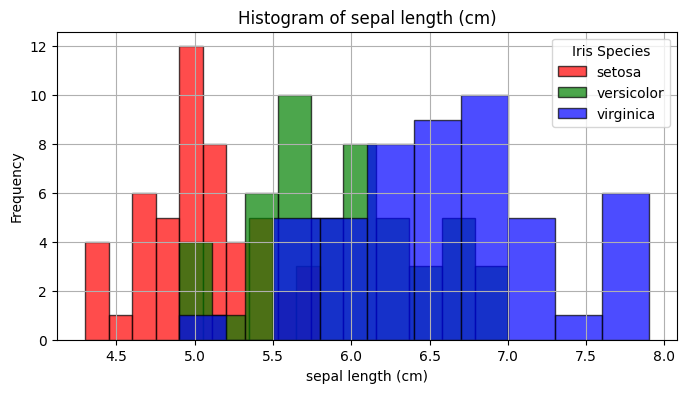

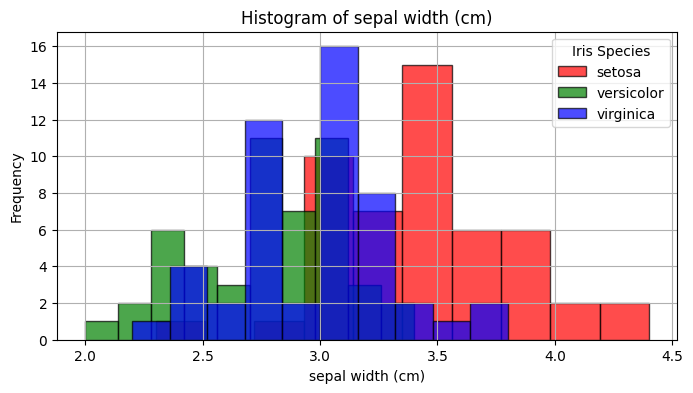

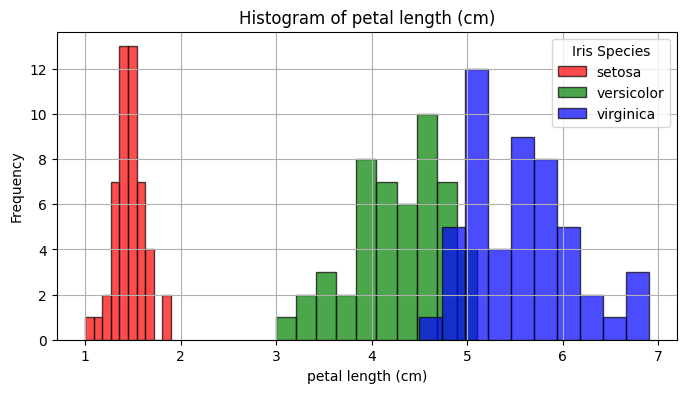

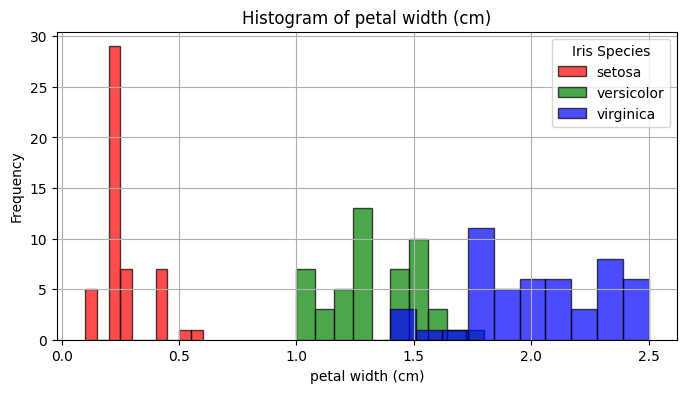

In [13]:
# Plot histograms for each feature
features = iris_dataframe.columns[:-2]  # Exclude 'target' and 'species' columns
species = iris_dataframe['species'].unique() # getting the unique species

# define the iris species colours
species_colours = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}

# Loop through the features and plot the histogram
for feature in features: 
    plt.figure(figsize=(8, 4)) # set the figure size
    for specie in species: # loop through the species
        iris_subset = iris_dataframe[iris_dataframe['species'] == specie] # subset the data by species
        plt.hist(iris_subset[feature], 
                 bins=10, edgecolor='k', alpha=0.7, label=specie, 
                 color=species_colours[specie]) # plot the histogram
    plt.title(f'Histogram of {feature}') # title of the graph
    plt.xlabel(feature) # x-axis label
    plt.ylabel('Frequency') # y-axis label
    plt.legend(title='Iris Species') # add the legend
    plt.grid(True)
    plt.show()

___
## **Task 5: Investigate Relationships**

The code below, creates a scatter plot of the relationship between **Sepal Length** and **Sepal Width** for the Iris dataset, with the data points colour-coded by species with appropraite figure legend. 

Using **Matplotlib's** `scatter()` method (see documentation [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)).

Scatter plots are used to visualise the relationship between two numerical features. As shown below **Sepal Length** and **Sepal Width**, **Setosa** has little overlap to no overlap with the other species, but **Versicolor** and **Virginica** overlap alot. 

<Figure size 800x400 with 0 Axes>

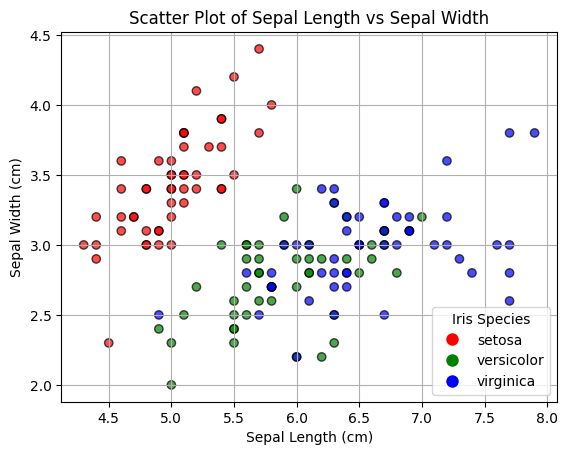

In [14]:
# Reference: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

# Define the size of the plot
plt.figure(figsize=(8, 4))  # Set the size of the figure

# Scatter plot of sepal length vs sepal width
fig, ax = plt.subplots()

# Create the scatter plot
scatter = ax.scatter(iris_dataframe['sepal length (cm)'], # x-axis
           iris_dataframe['sepal width (cm)'],  # y-axis 
            c=iris_dataframe['species'].map(species_colours),  # Map species to colours
            edgecolor='k',  # Add edge color to points
            alpha=0.7,)  # Set transparency


# Add labels and title
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Scatter Plot of Sepal Length vs Sepal Width')

# create the legend labels and handles
legend_labels = species_colours.keys()
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=species)
                  for species, color in species_colours.items()]

# create the legend labels and handles
ax.legend(legend_handles, legend_labels, title='Iris Species', loc='lower right')

# Show the plot
plt.grid(True)
plt.show()

# Note had trouble with the legend not shwoing so added in a custom l;egend - Reference: https://how2matplotlib.com/custom-legends-with-matplotlib.html

___
## **Task 6: Analyze  Relationships**

In the code below  **Numpy's** `polyfit()` method was used to add regression lines to the scatter plot from Task 5. 

See `polyfit()` method documentation [here](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html).

### **Detail Analysis of the Linear Regression**

>Equation of a Linear Regression Line  
>$ y = mx + c$

#### **Why the Linear Regression Best-Fit Line is Useful**
- The best-fit linear regression line calculated by numpy's `polyfit()` method was used above to model the relationship between two features: **'Sepal Length'** and **'Sepal Width'** for each Iris species.
Numpy's `polyfit()` calculates the simple linear regression lines by using the **least squares method**.
- It provides a mathematical model that can be used to make predictions about **Sepal Width** based on **Sepal Length**.
- Described below by comparing the slopes of the lines allows us to understand which species have a stronger or weaker relationship between the two features. 



#### **Across All the Species**
$y = -0.06x + 3.42$.    
- Above is the equation of the best fit linear line for the features **'Sepal Length'** vs **'Sepal Width'** across all species.
- There is a **weak negative correlation** between **'Sepal Length'** vs **'Sepal Width'** across all species. 
- This is represented by the **Black Line** on the graph.


#### **Setosa Species**
$y = 0.80x - 0.57$
- Above is the equation of the best fit linear line for the **Setosa** species (for the features **'Sepal Length'** vs **'Sepal Width'** ).
- There is a **strong positive correlation**, the strongest among all Iris species, between **'Sepal Length'** vs **'Sepal Width'** for **Setosa** Species.
- This is represented by the **Red Line** on the graph. 



#### **Versicolor Species**
$y = 0.32x + 0.87$
- Above is the equation of the best fit linear line for the **Versicolor** species (for the features **'Sepal Length'** vs **'Sepal Width'** ).
- There is a **weak positive correlation**, the second strongest among all the Iris species, between **'Sepal Length'** vs **'Sepal Width'** for **Versicolor** Species.
- This is represented by the **Green Line** on the graph. 



#### **Virginica Species**
$y = 0.23x + 1.45$
- Above is the equation of the best fit linear line for the **Virginica** species (for the features **'Sepal Length'** vs **'Sepal Width'** ).
- There is a **weakest positive correlation**, the weakest among all the Iris species, between **'Sepal Length'** vs **'Sepal Width'** for **Versicolor** Species.
- This is represented by the **Blue Line** on the graph.



#### **In Summary**
- The **Setosa** species shows the strongest positive correlation between **Sepal Length** and **Sepal Width**, as indicated by the steep slope of its best-fit line.
- The **Virginica** species shows the weakest positive correlation, with a nearly flat slope.
- Across all species, there is a weak negative correlation, suggesting that **Sepal Width** slightly decreases as **Sepal Length** increases when considering all species together.

The equation of the line of best fit for 'Sepal Length' vs 'Sepal Width'
Across All Iris Species is: y = -0.06x + 3.42

 - Setosa is: y = 0.80x + -0.57

 - Versicolor is: y = 0.32x + 0.87

 - Virginica is: y = 0.23x + 1.45


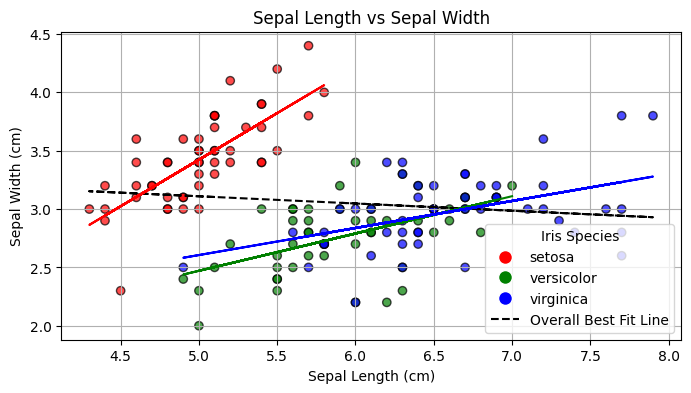

In [15]:
# Reference: https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html
# Reference: https://www.geeksforgeeks.org/numpys-polyfit-function-a-comprehensive-guide/
# Reference: https://www.geeksforgeeks.org/simple-linear-regression-using-r/ 

# Redefined the scatter plot from Task 5 with a line of best fit added in

# Scatter plot of sepal length vs sepal width
fig, ax = plt.subplots(figsize=(8, 4))

# Create the scatter plot
scatter = ax.scatter(iris_dataframe['sepal length (cm)'], # x-axis
           iris_dataframe['sepal width (cm)'],  # y-axis 
            c=iris_dataframe['species'].map(species_colours),  # Map species to colours
            edgecolor='k',  # Add edge color to points
            alpha=0.7,)  # Set transparency

# Add labels and title
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Sepal Width')

# create the legend labels and handles
legend_labels = species_colours.keys()
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=species)
                  for species, color in species_colours.items()]



# Add a line of best fit  
m, c = np.polyfit(iris_dataframe['sepal length (cm)'], iris_dataframe['sepal width (cm)'], 1) # straight line

# Plot the line of best fit across the whole dataset
overall_best_fit, = ax.plot(
    iris_dataframe['sepal length (cm)'], 
    m*iris_dataframe['sepal length (cm)'] + c, 
    color='black', 
    label='Overall Best Fit Line',
    linestyle='--',)

# Add the legend for the line of best fit
legend_handles.append(overall_best_fit)

# create the legend labels and handles
ax.legend(legend_handles, list(legend_labels) + ['Overall Best Fit Line'], title='Iris Species', loc='lower right')

# Print the equation of the line of best fit across the whole dataset
print(f'The equation of the line of best fit for'
      f' \'Sepal Length\' vs \'Sepal Width\'' 
      f'\nAcross All Iris Species is: y = {m:.2f}x + {c:.2f}')

# add a best fit line for each species by looping through the species and plotting the best fit line
for species, color in species_colours.items():
    # filter the data for a given species
    species_data = iris_dataframe[iris_dataframe['species'] == species]
    # calculate the best fit line for the species
    m, c = np.polyfit(species_data['sepal length (cm)'], species_data['sepal width (cm)'], 1)
    # plot the best fit line for the species
    ax.plot(species_data['sepal length (cm)'], 
            m*species_data['sepal length (cm)'] + c, 
            color=color, 
            label=f'{species.capitalize()} best fit line')
    # Print the equation of the line of best fit for the given species
    print(f'\n - {species.capitalize()} is: y = {m:.2f}x + {c:.2f}')


# Show the plot
plt.grid(True)
plt.show()

___
## **Task 7: Analyze  Class Distributions**

In the code below  **Mathplotlib's** `boxplot()` method was used to create a boxplot of the feature 'Petal Length' for each of the three species. 

See `boxplot()` method documentation [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html).


The Boxplots above provide a visual summary of the **Petal Lengths** for the 3 Iris Species: **Setosa**, **Versicolor**, and **Virginica**. Highlighting the clear differences in **Petal Length** distributions between the species.

From the Boxplot the following Observations can be made: 

**Setosa:**
- Setosa has the smallest Petal Length among the Iris Species.  
- The distribution is tightly clustered, with a small IQR, indicating low variability in petal length. 

**Versicolor:**
- Versicolor are larger than Setosa but smaller than Virginica. 
- The IQR is wider than Setosa, indicating more variability in Petal Length.

**Virginica:**
- Virginica has the largest Petal Lengths among the Iris Species.
- The IQR is similar to Versicolor, but the overall range of Petal Lengths is larger. 

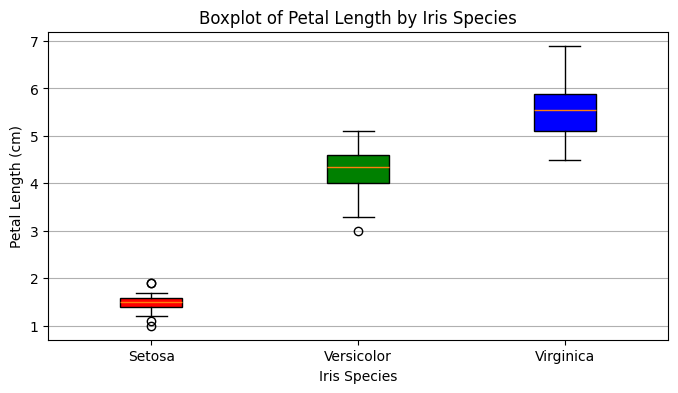

In [16]:
# get petal length data for each three classes
setosa_petal_length = iris_dataframe[iris_dataframe['species'] == 'setosa']['petal length (cm)']
versicolor_petal_length = iris_dataframe[iris_dataframe['species'] == 'versicolor']['petal length (cm)']
virginica_petal_length = iris_dataframe[iris_dataframe['species'] == 'virginica']['petal length (cm)']

# create boxplot
fig, ax = plt.subplots(figsize=(8, 4)) # set the size of the figure

# Create the boxplot of petal length for each species 
boxplot = ax.boxplot([setosa_petal_length, versicolor_petal_length, virginica_petal_length], 
           tick_labels=['Setosa', 'Versicolor', 'Virginica'],
           patch_artist=True) # plot the boxplot with colours

# fill with colors with the species colours
for patch, color in zip(boxplot['boxes'], species_colours.values()):
    patch.set_facecolor(color)

# Add labels and title
plt.xlabel('Iris Species')
plt.ylabel('Petal Length (cm)')
plt.title('Boxplot of Petal Length by Iris Species')

# Add grid lines
ax.yaxis.grid(True)

# Show the plot
plt.show()

# Reference: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html

___
## **Task 8: Compute Correlations**

In the below code the **`.corr()`** a method from **Pandas** is used to calculate the **Pearson Correlation Coefficient** (also known as the Standard Correlation Coefficient). See `.corr()` method documentation [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html). 

The Correlation Coefficient ranges from -1 to 1 and measures the linear relationship between two variables, in this case, the features of the Iris Dataset. 

The Correlation Coefficient is useful as it helps identify relationships between features, but it is important to note that potetnially strong correlations may provide redundant information, and weak correlations may be indicate independent features, but also there could be an unknown confounding variable. 

>***'Correlation Does Not Imply Causation'***

An **absolute value of 1** (i.e., 1 or -1) indicates a perfect linear relationship between the x and y, with every data point lying on the line. In the table title **'Correlation Matrix of the Iris Dataset Features'**, a value of 1 is seen when a **Feature** is correlated with itself. This value of 1 doesn't provide any useful insight and is an artifact of the way the calculation was done and displayed.

In the table an example of a ***Strong Positive Correlation Coefficient*** is seen between ***'Sepal Length'*** and ***'Petal Length'*** with a value of $0.872$. A ***Positive Correlation Coefficient*** means when x increases, y tends to increase as well or when ***'Sepal Length'*** increases so ***'Petal Length'*** tends to increase with a Strong Correlation but not perfect. 
> **Note:** The **Strongest Positive Correlation** is between ***'Petal legth'*** and ***'Petal Width'*** with a value of $0.963$.  

A value of 0 implies there is no linear relationship between the variables. Therefore values with close to 0 have a ***Weak Correlation Coefficient***. In the **'Correlation Matrix of the Iris Dataset Features'** for example, ***'Sepal Length'*** and ***'Sepal Width'*** have a ***Weak Negative Correlation Coefficient*** of $-0.118$.  

A **Negative Correlation Coefficient** means as x increases y tends to decreases. For example, ***'Petal Length'** and ***'Sepal Width'*** have a ***Weak to Moderate Negative Correlation Coefficient*** of $-0.428$ which suggests that when ***'Petal Length'** increases ***'Sepal Width'*** typically decreases but not in a perfectly linear way.



In [17]:
# Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
# Reference: https://www.geeksforgeeks.org/python-pandas-dataframe-corr/ 

iris_correlation_matrix = iris_dataframe.drop(columns=['target','species']).corr() # get the correlation matrix

iris_correlation_matrix.style.format("{:.3f}").set_caption("Correlation Matrix of the Iris Dataset Features") # display the correlation matrix with three decimal places


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000,-0.118,0.872,0.818
sepal width (cm),-0.118,1.000,-0.428,-0.366
petal length (cm),0.872,-0.428,1.000,0.963
petal width (cm),0.818,-0.366,0.963,1.000


### **Heatmap of the Correlation Coefficients Between the Features in the Iris Dataset**

The code below uses the **`.imshow`** method from Matplotlib (see documentation [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)) to create a heatmap of the correlation coefficients between the features of the Iris dataset. (previously calculated and stored in **`iris_correlation_matrix`**)

A Colour Bar is included to explaining what the Colours represent in the heatmap: 

- **Red** indicates a Strong Positive Correlation between Features (values close to **1**), 
- **Light Grey** indicates a Weak Correlation between the Features (values close to **0**),
- **Blue** indicates a Strong Negative Correlation between the Features (values close to **-1**).


 

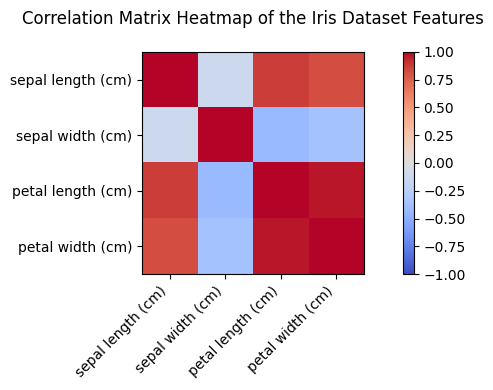

In [18]:
# Heatmap of the correlation matrix

plt.figure(figsize=(8, 4)) # set the size of the figure

# title of the graph addded in padding for spacing
plt.title('Correlation Matrix Heatmap of the Iris Dataset Features', pad=20) 

# plot the heatmap
plt.imshow(
    iris_correlation_matrix, 
    cmap='coolwarm', # set the colour map
    vmin=-1, # set the minimum value
    vmax = 1) # set the maximum value 

# add the color bar
plt.colorbar() 

# set the x-axis labels
plt.xticks(
    range(len(iris_correlation_matrix.columns)), # gets the range of the columns
    iris_correlation_matrix.columns, # get the column names
    rotation=45, # rotates the labels 45 degrees
    ha='right') # aligns the labels to the right

# set the y-axis labels
plt.yticks(
    range(len(iris_correlation_matrix.columns)), 
    iris_correlation_matrix.columns)


plt.tight_layout() # adjust the layout to fit the plot
plt.show() # show the plot
# Reference: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html


___
## **Task 9: Fit a Simple Linear Regression**

The two features in Task 5 that we displayed in a scatter plot where **Sepal Length** and **Sepal Width** in Task 6 we calculated the Linear Regression Best Fit Line for each Iris Species and the Overall Iris Dataset. 

In the code below we calculated and depicted the **$R^2$ Values** using **Scripy.stats** `lineregress` (see documentation [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html)) on the scatter plot from Task 5.



### Why the $R^2$ Value is Useful
- The **$R^2$ Value** answers the following question: 
    > ***"How well does my Linear Regresssion Best Fit Line (or other model) predict the actual data?"***
- It tells you how much of the variation in the Y-variable can be explained by the X-variable using the Linear Regression.
- An **$R^2$ Value** close to 1 means the Linear Regression Model explains most of the variability in the data, whereas a value closer to 0 means it explains very little.
- Key Summary:  
    - **$R^2$ Value** = 1 -> Perfect fit (the line goes through all points).
    - **$R^2$ Value** = 0 -> No fit (the line explains none of the variation).
    - **Higher $R^2$** (i.e., closer to 1) means the model fits the data.
    - **Lower $R^2$** (i.e., closer to 0) means the model doesn't fits the data.

### The $R^2$ Value for **Sepal Length** and **Sepal Width** 

- **Across all the species** the $R^2$ = 0.014, which is a very low $R^2$ Value indicating the model's doesn't fit the data. 
- **Setosa** the $R^2$  0.551, = which is a the largest $R^2$ Value but not a very high value. 
- Both **Versicolor** $R^2$ Value = 0.277, which is a weak correlation. 
- **Virginica** $R^2$ Value = 0.209, which is again a weak correlation.

Overall, the line regressions don't fit the data that well, especially across all species. While **Setosa** shows a moderate correlation, other species show weak linear relationships between **Sepal Length** and **Sepal Width**.


In [19]:
# Reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html
fit = stats.linregress(iris_dataframe['sepal length (cm)'], iris_dataframe['sepal width (cm)'])

# R value and R^2 value
print(f'For Sepal Length vs Sepal Width the R value is {fit.rvalue:.3f},\nTherefore R^2 value is {fit.rvalue**2:.3f}')

For Sepal Length vs Sepal Width the R value is -0.118,
Therefore R^2 value is 0.014


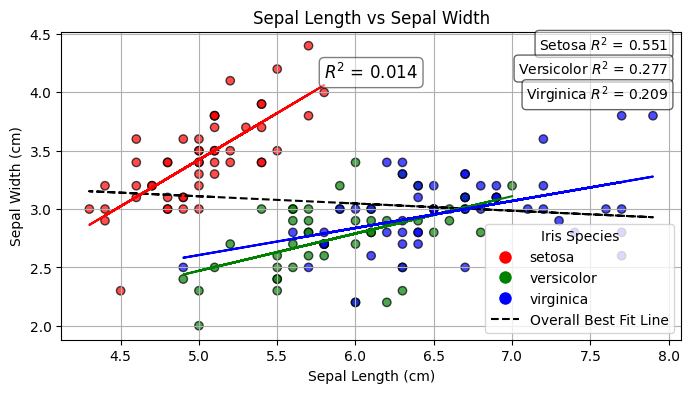

In [20]:

# Redefined the scatter plot from Task 5 with a line of best fit added in

# Scatter plot of sepal length vs sepal width
fig, ax = plt.subplots(figsize=(8, 4))

# Create the scatter plot
scatter = ax.scatter(
    iris_dataframe['sepal length (cm)'], # x-axis
    iris_dataframe['sepal width (cm)'],  # y-axis 
    c=iris_dataframe['species'].map(species_colours),  # Map species to colours
    edgecolor='k',  # Add edge color to points
    alpha=0.7,)  # Set transparency

# Add labels and title
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Sepal Width')

# create the legend labels and handles
legend_labels = species_colours.keys()
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=species)
                  for species, color in species_colours.items()]

# add R^2 value to the plot
plt.text(0.5, 0.9, f'$R^2$ = {fit.rvalue**2:.3f}',
         transform=ax.transAxes, 
         fontsize=12, 
         verticalalignment='top', 
         horizontalalignment='center', 
         bbox=dict(facecolor='white', alpha=0.5, edgecolor='black', boxstyle='round,pad=0.3'))

# Add a line of best fit  
m, c = np.polyfit(iris_dataframe['sepal length (cm)'], iris_dataframe['sepal width (cm)'], 1) # straight line

# Plot the line of best fit across the whole dataset
overall_best_fit, = ax.plot(
    iris_dataframe['sepal length (cm)'], 
    m*iris_dataframe['sepal length (cm)'] + c, 
    color='black', 
    label='Overall Best Fit Line',
    linestyle='--',)

# Add the legend for the line of best fit
legend_handles.append(overall_best_fit)

# create the legend labels and handles
ax.legend(legend_handles, list(legend_labels) + ['Overall Best Fit Line'], title='Iris Species', loc='lower right')

# Starting y position for the R^2 text
r2_text_y = 0.94
# Starting x position for the R^2 text
r2_text_x = 0.98
# Step size for the R^2 text
r2_step = 0.08


# add a best fit line for each species by looping through the species and plotting the best fit line
for i, (species, color) in enumerate(species_colours.items()):
    # filter the data for a given species
    species_data = iris_dataframe[iris_dataframe['species'] == species]
    # calculate the best fit line for the species
    m, c = np.polyfit(species_data['sepal length (cm)'], species_data['sepal width (cm)'], 1)
    # plot the best fit line for the species
    ax.plot(species_data['sepal length (cm)'], 
            m*species_data['sepal length (cm)'] + c, 
            color=color, 
            label=f'{species} best fit line')
    # Calculate the R^2 value for the species
    species_data_fit = stats.linregress(species_data['sepal length (cm)'], species_data['sepal width (cm)'])
    species_r2 = species_data_fit.rvalue**2
    # add R^2 value to the plot
    plt.text(
        r2_text_x, r2_text_y - i * r2_step, f'{species.title()} $R^2$ = {species_r2:.3f}',
        transform=ax.transAxes,
        fontsize=10,
        bbox=dict(facecolor='white', alpha=0.6, edgecolor='black', boxstyle='round,pad=0.3'),
        horizontalalignment='right')



# Show the plot 
plt.grid(True)
plt.show()



# Reference: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html - used this for getting the text on the plot

___
## **Task 10: Too Many Features** 

**Seaborn's** `pairplot()` function (see documentation [here](https://seaborn.pydata.org/generated/seaborn.pairplot.html)) creates a grid of plots that show the relationship between each pair of numerical variables in a dataset. It is a powerful tool for exploratory data analysis, as it provides a quick and comprehensive visual summary of the relationships between multiple numerical variables. See [Geek For Geeks]('https://www.geeksforgeeks.org/python-seaborn-pairplot-method/') for a helpful guide on how to use `pairplot()`.

In the code below:
- **Off-Diagonal plots** show scatterplots with regression lines (using the argument `kind='reg'` ), helping us understand the correlation and trends. 
- **Diagonal plots** display the distribution of each variable giving us insight into the spread of the data across the Iris dataset. 
- The `hue='species'` argument and the `palette='species_colours'` argument colours the data points based upon the species with the colour coding used throughout this analysis of the Iris Dataset: `{'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue',  }`

For example, in the Iris dataset, the pairplot depicted below reveals which features are most strongly correlated and how well the species are separated in feature space. The visualisation below is particularly useful for identifying patterns, correlations or potential outliers in the data. 

Had we performed a pairplot analysis of the Iris dataset prior to selecting the two features analysis in Task 5 (where a scatterplot of **Sepal Length** and **Sepal Width** was created) and Task 6 (where a linear regression best-fit Line was calculated), we might have chosen a different feature pair with a stronger correlation. As shown in Task 9, the regression line between **Sepal Length** and **Sepal Width** had a very weak  $R^2$ Value of 0.014, suggesting little to no linear relationship. 

For instance, the **Sepal Length** and **Petal Length** visually looks to have a stronger correlation in the pairplot. As noted in Task 8's correlation Matrix **Sepal Length** and **Petal Length**  had Pearson correlation coefficient of 0.872. To explore the relationship a bit more the $R^2$ Value was calculated below the pairplot to be = 0.760 (see the code cell below the pairplot). Validating the visually recognised relationship, providing an example of the valuing of the pairplot in exploratory data analysis.


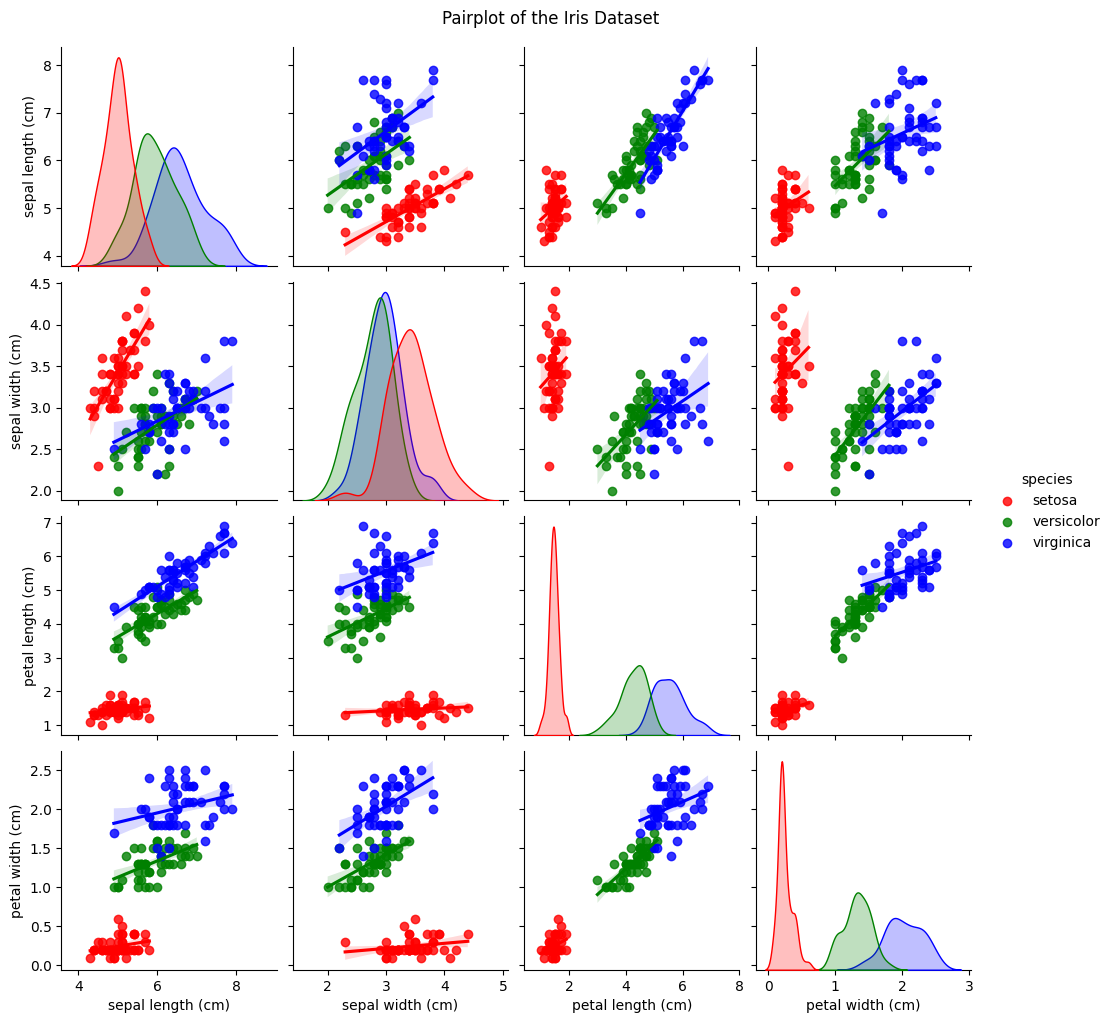

In [21]:
# reference: https://seaborn.pydata.org/generated/seaborn.pairplot.html 
# reference: https://pytutorial.com/python-seaborn-pairplot-visualize-data-relationships/

iris_pairplot = sns.pairplot(
                            data=iris_dataframe.drop(columns='target'), # drop the target column and keeps the other numeric columns
                            hue='species', # set the hue to be the species
                            kind='reg', # set the kind of plot to be a regression plot
                            palette=species_colours, # set the colours of the species
                            diag_kind='kde', # set the diagonal to be a kde plot
                            height=2.5, # set the size of the figure
                             )

# add the title to the figure
iris_pairplot.fig.suptitle('Pairplot of the Iris Dataset', y=1.02)

# show the plot 
plt.show()

#### Additional Analaysis for Task 10

In [22]:
# Exploration of the relationship between sepal length and petal length noticed in the pairplot
fit_sepal_l_petal_l = stats.linregress(iris_dataframe['sepal length (cm)'], iris_dataframe['petal length (cm)'])

# R^2 value
print(f'The R^2 value is {fit_sepal_l_petal_l.rvalue**2:.3f}')

The R^2 value is 0.760


# End